         video_name label_name  label  first_frame  last_frame  number_frames
0     1CM1_4_R_#229        D0X      1            1          17             17
1     1CM1_4_R_#229        G11     14           18          55             38
2     1CM1_4_R_#229        B0B      3           56         284            229
3     1CM1_4_R_#229        G04      7          285         308             24
4     1CM1_4_R_#229        B0B      3          309         502            194
...             ...        ...    ...          ...         ...            ...
4034  4CM11_7_R_#36        B0A      2         3333        3573            241
4035  4CM11_7_R_#36        G04      7         3574        3688            115
4036  4CM11_7_R_#36        B0A      2         3689        3891            203
4037  4CM11_7_R_#36        G05      8         3892        3959             68
4038  4CM11_7_R_#36        D0X      1         3960        3994             35

[4039 rows x 6 columns]
[162090, 165019, 8287, 9034, 9117, 9781

/tmp/ipykernel_51924/2497120046.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '12.905176136714172' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  label_distribution.loc[i] = label_distribution.loc[i] / video_frames_distribution[i-2] * 100


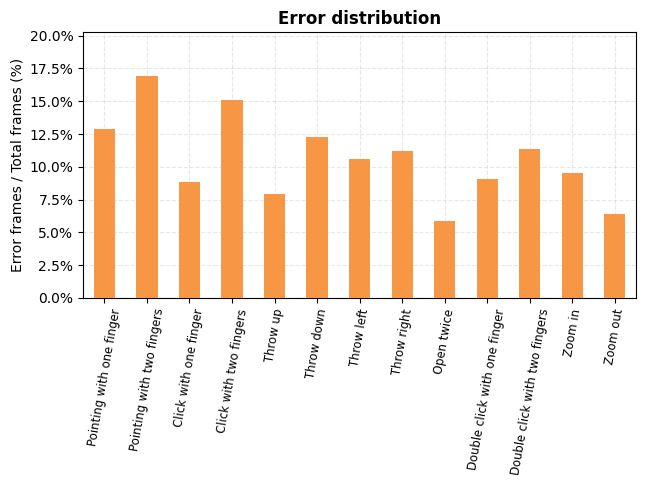

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

idx_to_label = {
    1: "Non-gesture",
    2: "Pointing with one finger",
    3: "Pointing with two fingers",
    4: "Click with one finger",
    5: "Click with two fingers",
    6: "Throw up",
    7: "Throw down",
    8: "Throw left",
    9: "Throw right",
    10: "Open twice",
    11: "Double click with one finger",
    12: "Double click with two fingers",
    13: "Zoom in",
    14: "Zoom out"
}

video_distribution = [1010, 1007, 200, 200, 200, 201, 200, 200, 200, 200, 200, 200, 200]
video_names = [idx_to_label[i] for i in range(2, 15)]

annotations = pd.read_csv("/mnt/RESOURCES/josemanuelbravo/GestureRecognitionSystem/data/IPN_Hand/annotations/Annot_TrainList.txt")
print(annotations)
video_frames_distribution = []
for i in range(2, 15):
    video_frames_distribution.append(annotations[annotations["label"] == i]["number_frames"].sum())
print(video_frames_distribution)

no_detections = pd.read_csv("no_detections.csv")

no_detections_gest = no_detections[no_detections["label"] != 1] 
print(f"No detections: {len(no_detections_gest)}")

label_distribution = no_detections_gest["label"].value_counts()
for i in range(2, 15):
    label_distribution.loc[i] = label_distribution.loc[i] / video_frames_distribution[i-2] * 100

print(f"Media de errores: {label_distribution.mean()}")

label_distribution.sort_index().plot(kind='bar', color='#f79645', zorder=3)
plt.ylabel("Error frames / Total frames (%)")
plt.title("Error distribution", weight='semibold')
plt.xlabel("")
plt.xticks(range(0, 13), video_names, rotation=80, size='small')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.margins(0.2)
plt.tight_layout(pad=0.5)
plt.grid(zorder=0, alpha=0.3, linestyle='--')


print(label_distribution)

video_name                                        1CV12_7_R_#81
label                                                         5
frame                                                       686
path          /mnt/RESOURCES/josemanuelbravo/GestureRecognit...
Name: 70824, dtype: object


(-0.5, 319.5, 239.5, -0.5)

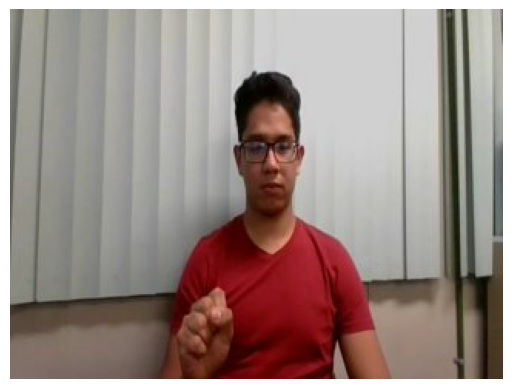

In [125]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

no_detections = pd.read_csv("no_detections.csv")
no_detections_gest = no_detections[no_detections["label"] == 5]

frame_not_detected = no_detections_gest.iloc[np.random.randint(0, len(no_detections_gest))]
print(frame_not_detected)

image = cv2.imread(frame_not_detected["path"])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')


Text(0.5, 0.98, 'Examples of frames with no detections')

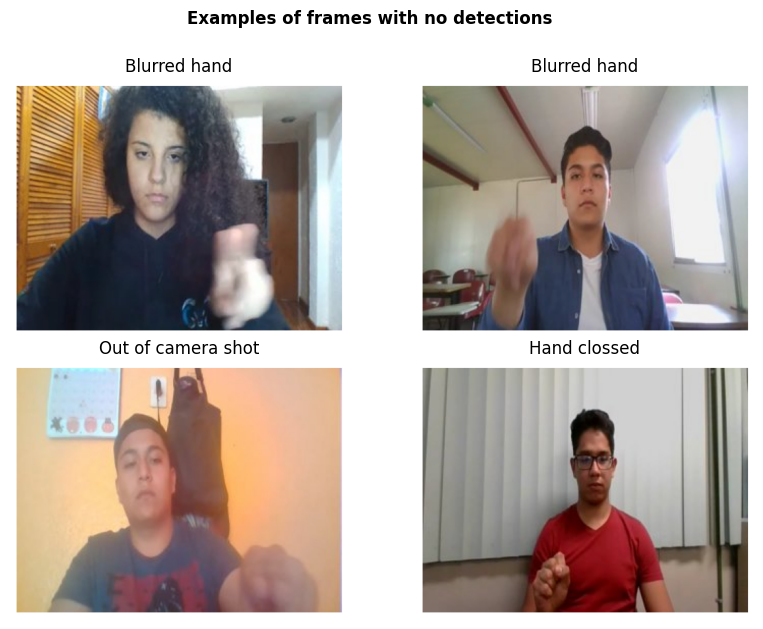

In [133]:
import cv2
import matplotlib.pyplot as plt

images = [cv2.imread(f"no_detection_images/no_detection_{i}.png") for i in range(1, 5)]

fig, axs = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True, gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
for i, ax in enumerate(axs.flat):
    ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    ax.axis('off')

axs[0, 0].set_title("Blurred hand")
axs[0, 1].set_title("Blurred hand")
axs[1, 0].set_title("Out of camera shot")
axs[1, 1].set_title("Hand clossed")
fig.suptitle("Examples of frames with no detections", weight='semibold')